# Logistic Regression with Statsmodels

Notebook Contents
* [EDA](#scrollTo=eda)
* [Outlier Analysis](#scrollTo=outlier-analysis)
* [Data Processing](#scrollTo=xJLSQenKFVVa)
* [Model Fitting](#scrollTo=model-fitting)
* [Model Output](#scrollTo=model-output)
* [Summary Output Interpretation](#scrollTo=PowCU-umRe1y)
* [Coefficient Interpretation](#scrollTo=PgHi84mKYtMe)
* [Goodness of Fit Hypothesis Tests](#scrollTo=SWek1ljiD1Ee)
* [Goodness of Fit Visual Analysis](#scrollTo=MbDd5Z0AD1Eo)
* [Model Assumptions & Diagnostics](#scrollTo=model-assumptions)
* [Model Evaluation](#scrollTo=model-evaluation)
* [Threshold Tuning](#scrollTo=Ov4woSL7D1Ep)
* [Cross Validation](#scrollTo=hs-YhYKXD1Ep)
* [Model Comparison](#scrollTo=model-comparison)

## Connect to Google Drive Locally

First, let's connect to Google Drive to access our dataset.

In [ ]:
# For Google Colab:
from google.colab import drive
drive.mount('/content/drive')

# For local Jupyter notebooks, you would typically access files directly
# from your local filesystem. This section would be adapted based on your
# specific setup and where your data files are stored.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Libraries

Let's import the necessary libraries for our analysis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
# import warnings
# warnings.filterwarnings('ignore')

# Set plot style
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [ ]:
# read from
path = '/content/drive/MyDrive/Colab/Datasets/telco-customer-churn.csv'
# path = '/data/telco-customer-churn.csv'
df = pd.read_csv(path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (7043, 21)

First few rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Cleaning

In [ ]:
df = df[df['TotalCharges'] != ' ']
df['TotalCharges'] = df['TotalCharges'].astype('float')
df.reset_index(drop=True, inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

## Exploratory Data Analysis (EDA)

Let's explore the dataset to understand its structure and characteristics.

In [ ]:
# Basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nDataset Description:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-n

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


## Categorical Feature Analysis

Overall target mean: 26.58%


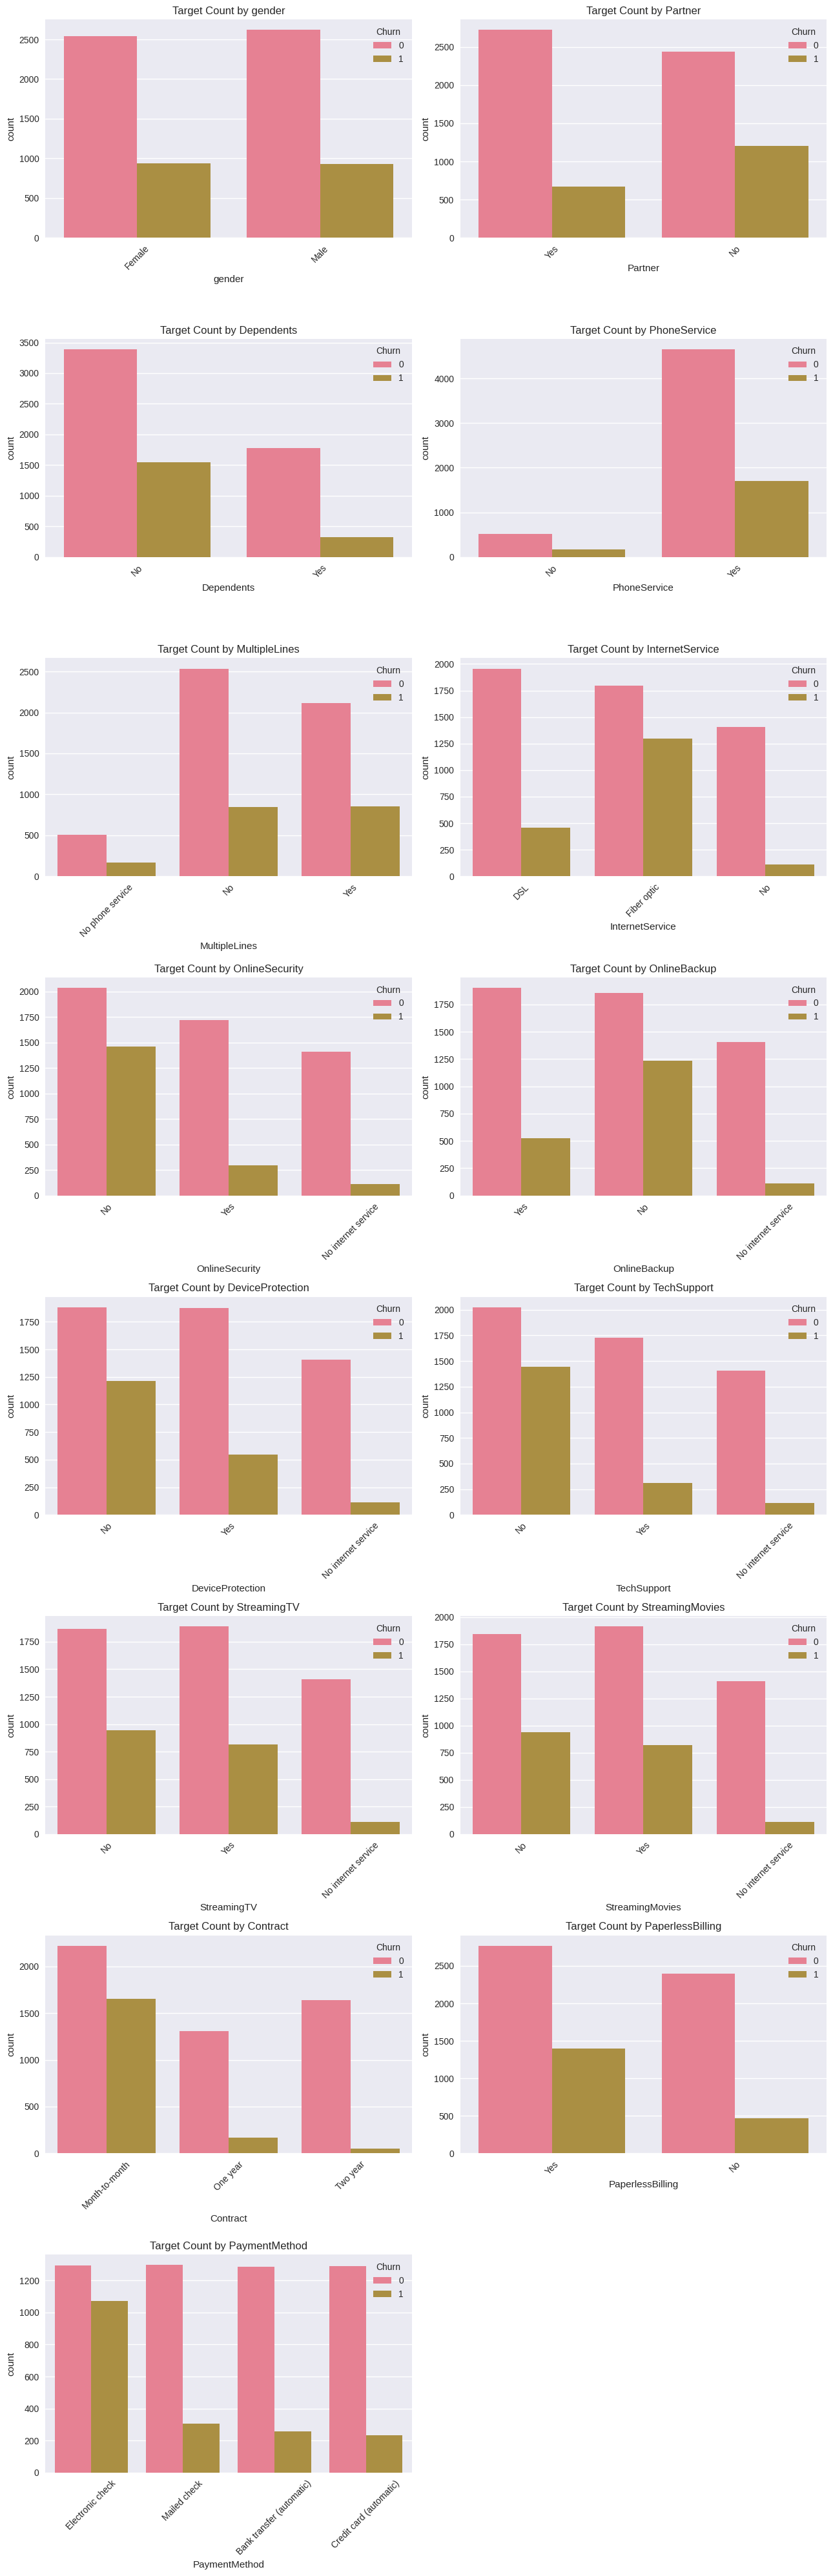

In [ ]:
# Mean target
target = 'Churn'
mean_target = df[target].mean()
print(f"Overall target mean: {mean_target:.2%}")


# Number of plots and grid shape
cols_to_remove = ['customerID']
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
filtered_cols = [item for item in cat_cols if item not in cols_to_remove]
n = len(filtered_cols)
cols = 2
rows = math.ceil(n / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6.5, rows * 5))
axes = axes.flatten()

# Plot each categorical variable
for i, col in enumerate(filtered_cols):
    sns.countplot(data=df, x=col, hue=target, ax=axes[i])
    axes[i].set_title(f'Target Count by {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

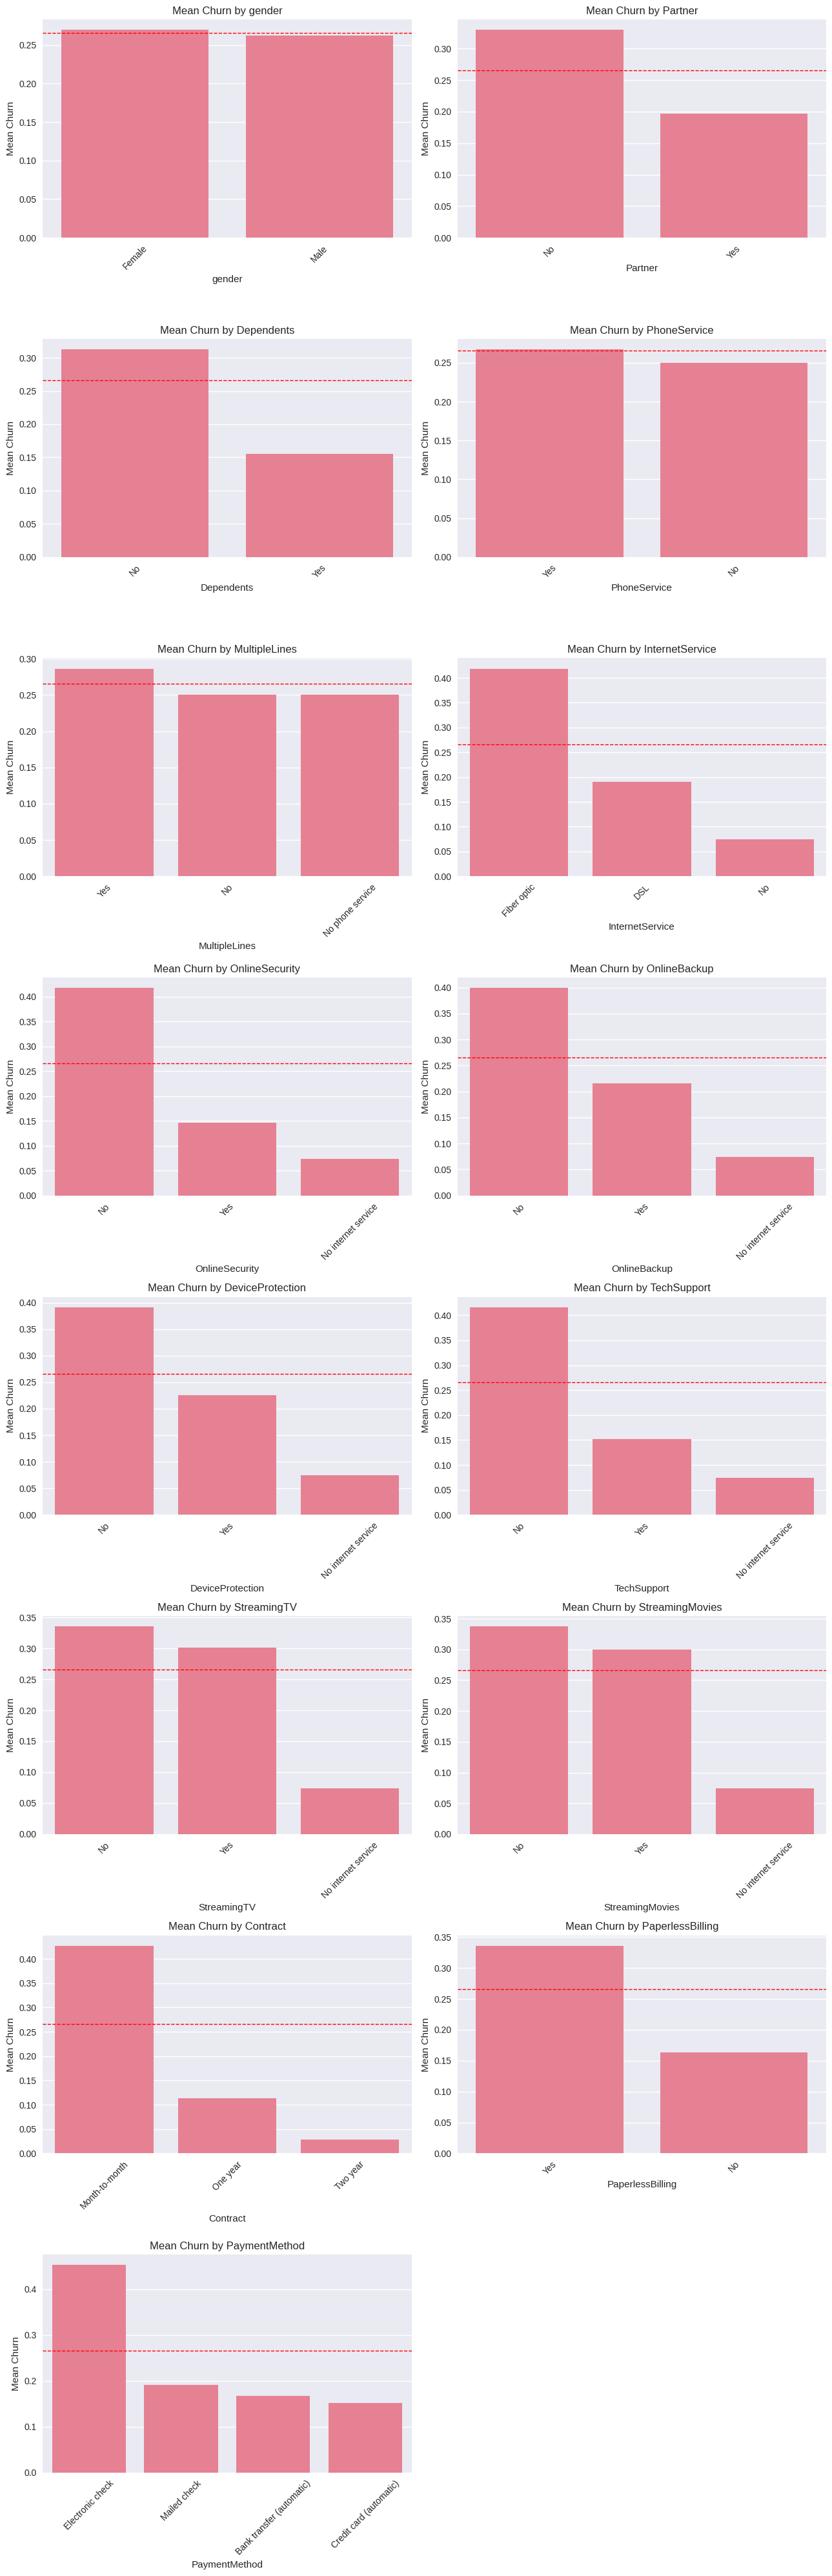

In [ ]:
# plot mean target across all categorical variables
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6.5, rows * 5))
axes = axes.flatten()

# Plot mean target for each category
for i, col in enumerate(filtered_cols):
    # Calculate mean target per category
    grouped = df.groupby(col)[target].mean().reset_index()

    # Sort categories by mean value (optional for clarity)
    grouped = grouped.sort_values(by=target, ascending=False)

    sns.barplot(data=grouped, x=col, y=target, ax=axes[i])
    axes[i].set_title(f'Mean {target} by {col}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].axhline(mean_target, color='red', linestyle='--', linewidth=1)
    axes[i].set_ylabel(f'Mean {target}')
    axes[i].set_xlabel(col)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Numeric Feature Analysis

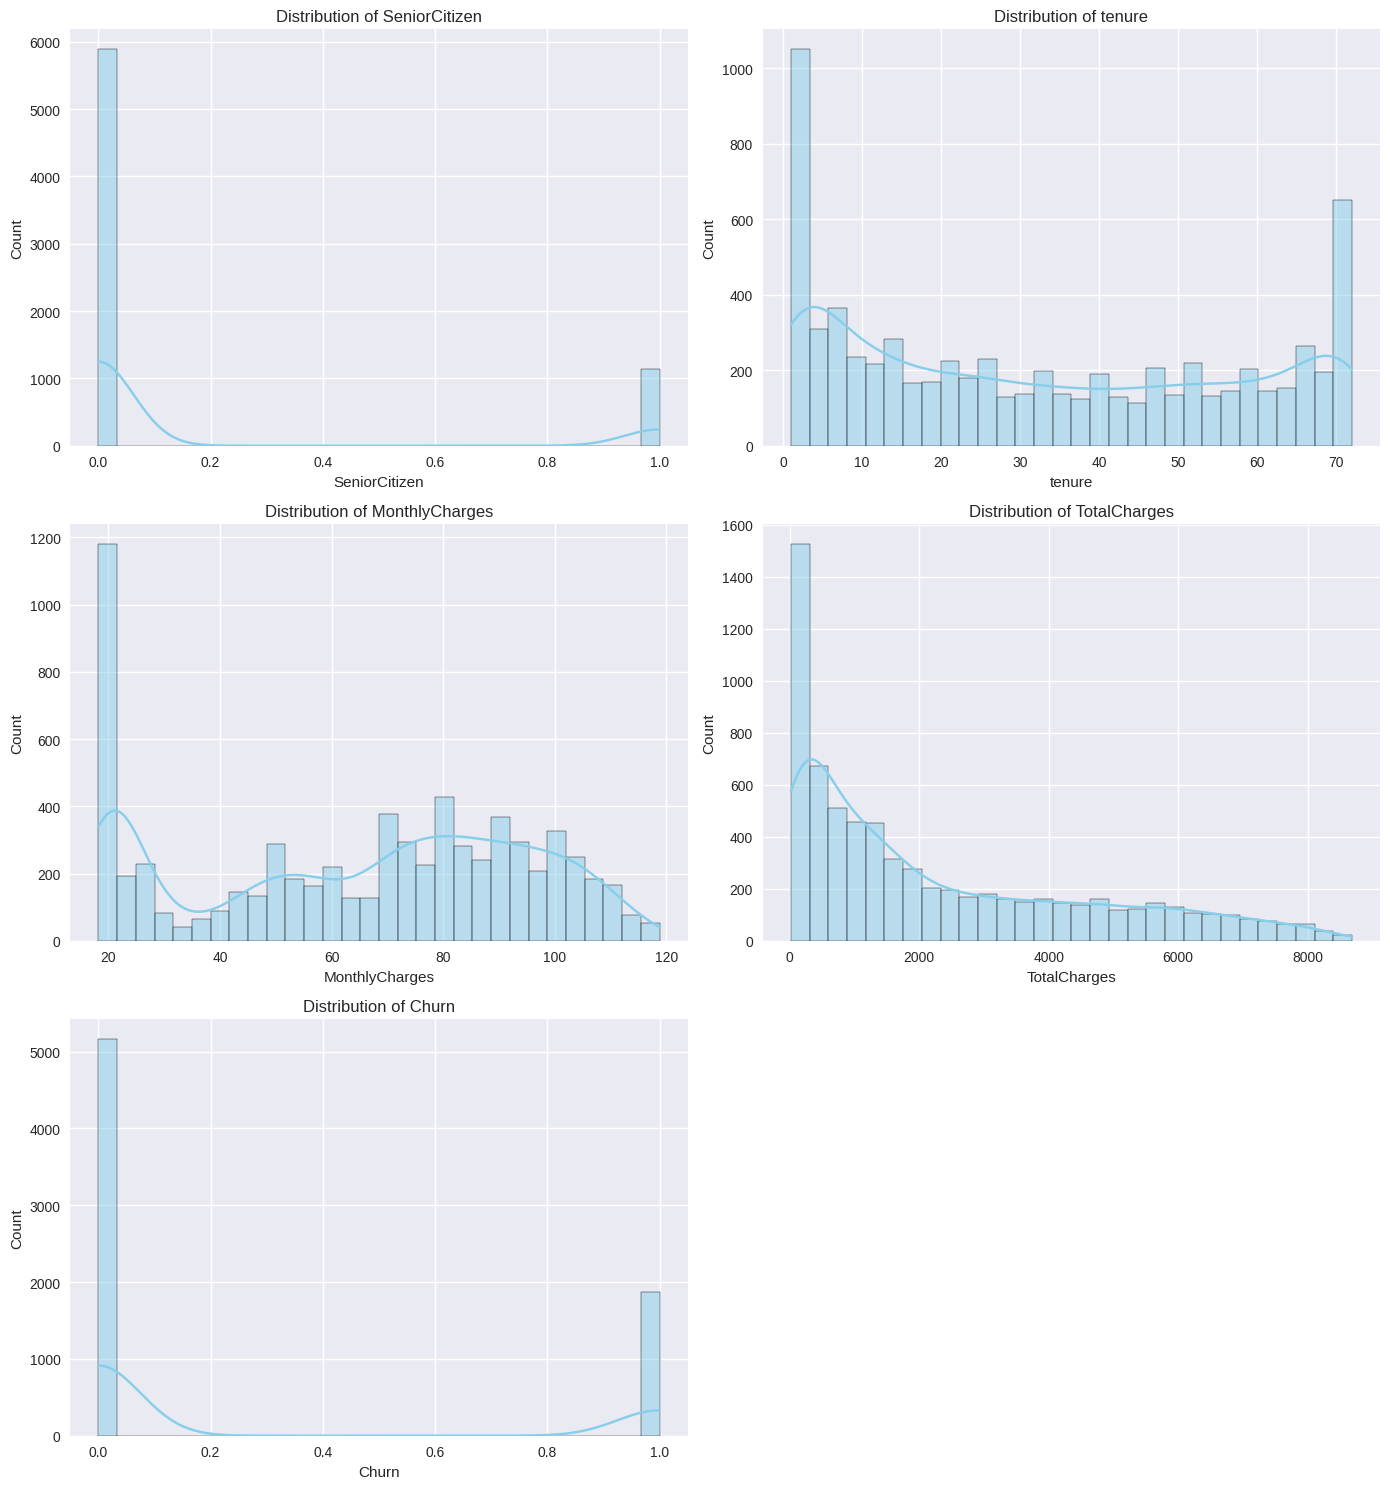

In [ ]:
# # Optional: columns to exclude
# cols_to_remove = ['customerID', 'some_other_column']  # <-- adjust as needed

# Select numeric features
num_cols = df.select_dtypes(include='number').columns.tolist()
filtered_cols = [col for col in num_cols if col not in cols_to_remove]

# Subplot layout
n = len(filtered_cols)
cols = 2
rows = math.ceil(n / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 7, rows * 5))
axes = axes.flatten()

# Plot each numeric feature with KDE
for i, col in enumerate(filtered_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], bins=30, color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)

# Remove unused axes if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

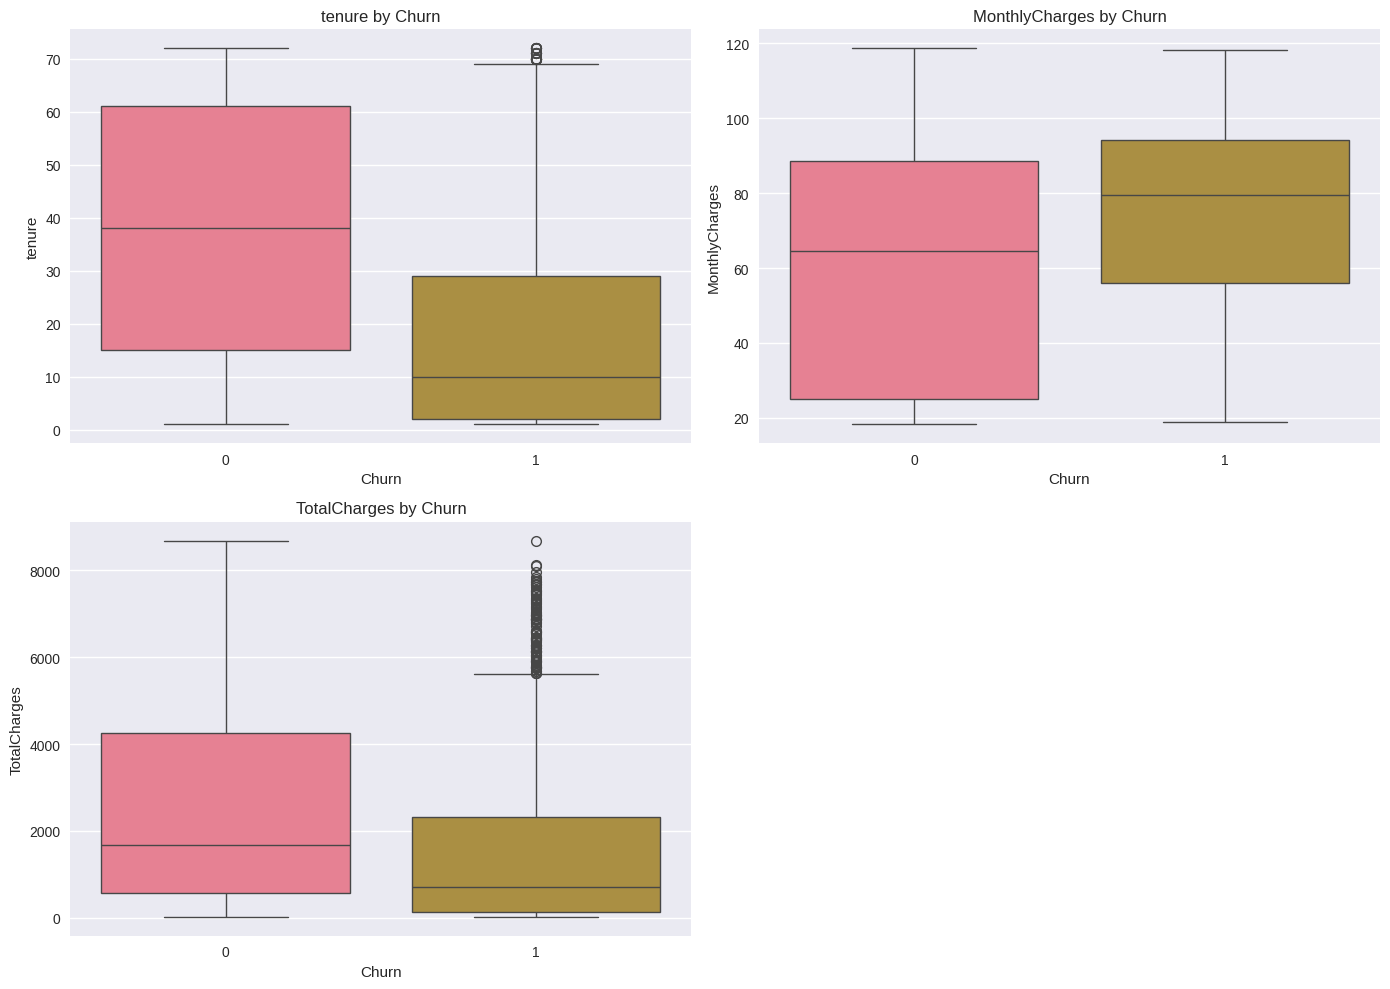

In [ ]:
# Define your target variable
target = 'Churn'  # Replace with your actual target name

# Optional: columns to exclude
cols_to_remove = ['Churn', 'SeniorCitizen']  # Customize this list

# Select numeric features (and remove excluded ones)
num_cols = df.select_dtypes(include='number').columns.tolist()
filtered_cols = [col for col in num_cols if col not in cols_to_remove]

# Subplot layout
n = len(filtered_cols)
cols = 2
rows = math.ceil(n / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 7, rows * 5))
axes = axes.flatten()

# Plot each numeric feature as a boxplot
for i, col in enumerate(filtered_cols):
    sns.boxplot(data=df, x=target, y=col, ax=axes[i], hue=target, legend=False)
    axes[i].set_title(f'{col} by {target}')
    axes[i].set_xlabel(target)
    axes[i].set_ylabel(col)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show();

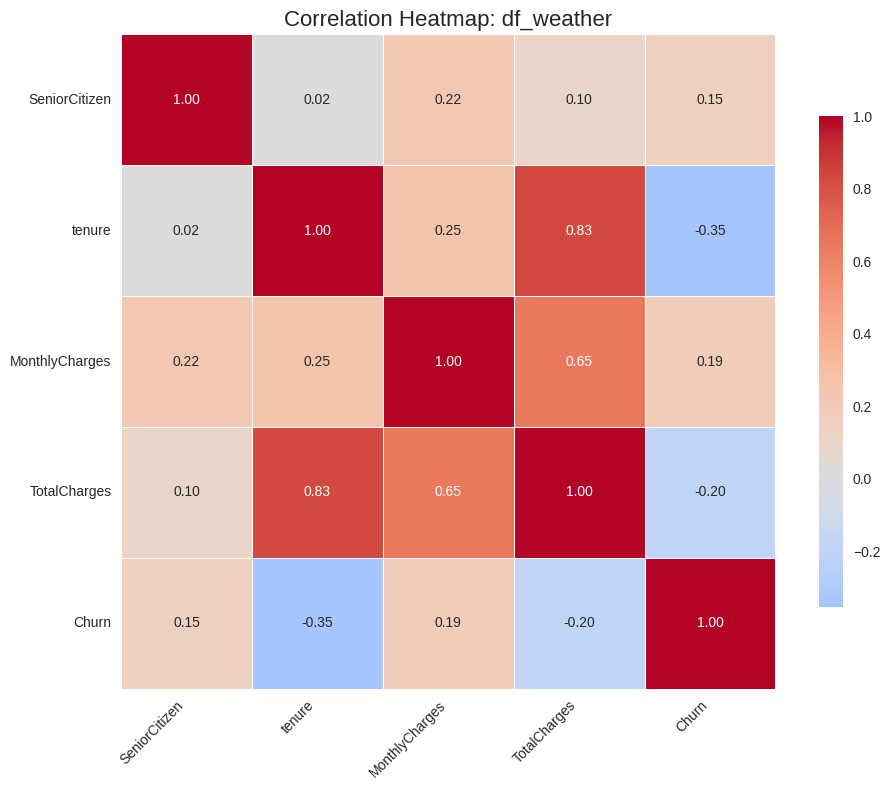

In [ ]:
# correlation matrix
corr_matrix = df.corr(numeric_only=True)  # Use numeric_only=True for pandas >=1.5

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,       # Show correlation coefficients
    cmap='coolwarm',  # Color map
    center=0,         # Center the colormap at zero
    fmt=".2f",        # Format the numbers to 2 decimal places
    square=True,      # Make cells square
    linewidths=0.5,   # Cell border lines
    cbar_kws={"shrink": 0.75}  # Shrink color bar
)
plt.title("Correlation Heatmap: df_weather", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Data Overview

Categorical (2 levels):
* gender
* Partner
* Dependents
* PhoneService
* PaperlessBilling

Categorical (>2 levels):
* MultipleLines
* InternetService
* OnlineSecurity
* OnlineBackup
* DeviceProtection
* TechSupport
* StreamingTV
* StreamingMovies
* Contract
* PaymentMethod

Numeric:
* SeniorCitizen
* tenure
* MonthlyCharges
* TotalCharges

Target
* Churn (Categorical - 2 levels)

# Outlier Analysis

In [ ]:
# Statistical outlier detection
# Select numeric features (and remove excluded ones)
num_cols = df.select_dtypes(include='number').columns.tolist()
numerical_columns = [col for col in num_cols if col not in cols_to_remove]

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"{col} outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    print(f"  Lower bound: {lower_bound:.2f}")
    print(f"  Upper bound: {upper_bound:.2f}")

tenure outliers: 0 (0.00%)
  Lower bound: -60.00
  Upper bound: 124.00
MonthlyCharges outliers: 0 (0.00%)
  Lower bound: -45.82
  Upper bound: 171.27
TotalCharges outliers: 0 (0.00%)
  Lower bound: -4688.48
  Upper bound: 8884.67


---

# Data Preparation

* v1_cols = `['tenure', 'TotalCharges', 'MonthlyCharges', 'Contract', 'Churn']`
* v2_cols = `['tenure', TotalCharges', 'MonthlyCharges', 'Contract', 'OnlineSecurity', 'InternetService', 'PaymentMethod', 'Churn']`

* One-hot encode categorical features, choose baseline level (lowest mean target) = df_processed_v1

In [ ]:
v1_cols = ['tenure', 'TotalCharges', 'MonthlyCharges', 'Contract', 'Churn']
# v1_cols = ['tenure', 'TotalCharges', 'Contract', 'Churn']
df_processed_v1 = df[v1_cols]

# Let's say you want Mondayas the baseline
cat_col = 'Contract'
cat_col_levels = ['Two year', 'One year', 'Month-to-month']
df_processed_v1[cat_col] = pd.Categorical(df_processed_v1[cat_col],
    categories=cat_col_levels)

# The dropped dummy is your reference level. In this case Monday
df_processed_v1 = pd.get_dummies(df_processed_v1, columns=[cat_col], drop_first=True, dtype=int)

/tmp/ipython-input-1964334803.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed_v1[cat_col] = pd.Categorical(df_processed_v1[cat_col],


In [ ]:
df_processed_v1.head()

,tenure,TotalCharges,MonthlyCharges,Churn,Contract_One year,Contract_Month-to-month
0,1,29.85,29.85,0,0,1
1,34,1889.50,56.95,0,1,0
2,2,108.15,53.85,1,0,1
3,45,1840.75,42.30,0,1,0
4,2,151.65,70.70,1,0,1


# Model Fitting

In [ ]:
# Prepare data for modeling
X = df_processed_v1.drop('Churn', axis=1)
y = df_processed_v1['Churn']

# Add constant for intercept
X = sm.add_constant(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model
model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.432782
         Iterations 8


## Model Summary Output

In [ ]:
# Display model summary
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5625
Model:                          Logit   Df Residuals:                     5619
Method:                           MLE   Df Model:                            5
Date:                Thu, 28 Aug 2025   Pseudo R-squ.:                  0.2526
Time:                        21:28:34   Log-Likelihood:                -2434.4
converged:                       True   LL-Null:                       -3257.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.3745      0.220    -15.365      0.000      -3.805      -2.944
tenure                     -0.0556      0.007     -8.254      0.000      -0.069      -0.042


| Output Element     | Description                                       | Interpretation Notes                                            | Access in `statsmodels`                  |                                  |                 |
| ------------------ | ------------------------------------------------- | --------------------------------------------------------------- | ---------------------------------------- | -------------------------------- | --------------- |
| `Dep. Variable`    | The binary outcome being modeled                  | Must be 0/1 coded or interpretable as binary                    | `model.model.endog_names`                |                                  |                 |
| `Model`            | The type of model used (`Logit`)                  | Indicates binary logistic regression                            | `type(model.model).__name__`             |                                  |                 |
| `Method`           | Estimation method used (MLE)                      | Maximum Likelihood Estimation is standard for Logit             | `model.method`                           |                                  |                 |
| `Date`             | Date the model was fit                            | Useful for reproducibility                                      | `model.summary2().tables[0].loc['Date']` |                                  |                 |
| `Time`             | Time the model was fit                            | —                                                               | `model.summary2().tables[0].loc['Time']` |                                  |                 |
| `No. Observations` | Total number of observations used                 | Number of rows included in training                             | `model.nobs`                             |                                  |                 |
| `Df Residuals`     | Degrees of freedom of residuals (\$n - p\$)       | Residual degrees of freedom                                     | `model.df_resid`                         |                                  |                 |
| `Df Model`         | Number of predictors (not including intercept)    | Used to compute LLR statistic                                   | `model.df_model`                         |                                  |                 |
| `Pseudo R-squ.`    | McFadden's Pseudo R²                              | Values between 0.2–0.4 suggest excellent model fit              | `model.prsquared`                        |                                  |                 |
| `Log-Likelihood`   | Log-likelihood of the fitted model                | Higher is better                                                | `model.llf`                              |                                  |                 |
| `LL-Null`          | Log-likelihood of null (intercept-only) model     | Used to compute pseudo R²                                       | `model.llnull`                           |                                  |                 |
| `LLR p-value`      | Likelihood Ratio Test p-value                     | Tests whether the model as a whole is statistically significant | `model.llr_pvalue`                       |                                  |                 |
| `converged`        | Whether the optimization converged                | `True` means the model successfully converged                   | `model.mle_retvals['converged']`         |                                  |                 |
| `Covariance Type`  | Type of standard error estimation                 | `nonrobust` by default; robust options also available           | `model.cov_type`                         |                                  |                 |
| `coef`             | Estimated log-odds coefficients (\$\hat{\beta}\$) | Positive → increases log-odds; Negative → decreases             | `model.params`                           |                                  |                 |
| `std err`          | Standard error of each coefficient                | Precision of the coefficient estimate                           | `model.bse`                              |                                  |                 |
| `z`                | z-statistic for testing \$H\_0: \beta = 0\$       | `z = coef / std err`                                            | `model.tvalues`                          |                                  |                 |
|

# Model Interpretation

🔍 Interpretation of Logit Model Output
* Log-Likelihood Ratio (LLR) p-value of 0.000 suggests the overall model is statistically significant.
This means that at least one of the predictors is significantly related to the likelihood of churn.

* Pseudo R-squared (McFadden) = 0.2526 indicates a decent model fit.
Values between 0.2–0.4 are considered excellent for logistic regression.

* Model converged = True, which means that the maximum likelihood optimization successfully found a solution.

# Coefficient Interpretation

In [ ]:
def get_coefficient_numbers(fitted_model):
  df_model_params = fitted_model.params.to_frame()
  df_model_params.rename(columns={0: "coefficient"}, inplace=True)

  df_model_params['factor'] = df_model_params['coefficient'].apply(math.exp)
  df_model_params['odds_pct_chg'] = df_model_params.apply(lambda x: round((1 - x['factor']) * 100, 3) if x['coefficient'] < 0 else round((x['factor'] - 1) * 100, 3), axis = 1)
  return df_model_params

In [ ]:
df_model_params = get_coefficient_numbers(model)
df_model_params

,coefficient,factor,odds_pct_chg
const,-3.374481,0.034236,96.576
tenure,-0.055642,0.945878,5.412
TotalCharges,0.000243,1.000243,0.024
MonthlyCharges,0.025061,1.025378,2.538
Contract_One year,0.870758,2.388722,138.872
Contract_Month-to-month,2.035709,7.657676,665.768


In [ ]:
def interpret_logistic_model(df_model_params, target_name='churn', ref_labels=None):
    """
    Generates dynamic interpretation statements for a logistic regression model.

    Parameters:
    - df_model_params: DataFrame with 'coefficient', 'odds_pct_chg', 'factor', and index = feature names
    - target_name: name of target class (default: 'churn')
    - ref_labels: dict mapping dummy variable names to reference group (for categorical vars)
    """

    for feature in df_model_params.index:
        coef = df_model_params.loc[feature, 'coefficient']
        coef_rounded = round(coef, 3)

        if feature == 'const':
            const_odds = round(math.exp(coef) * 100, 1)
            print(f"The intercept (constant) is {coef_rounded}, representing the log-odds of {target_name} when all predictors are zero.")
            print(f"The odds of {target_name} for a baseline case is approximately {const_odds}%.\n")
            continue

        # Get additional metrics
        odds_pct_chg = df_model_params.loc[feature, 'odds_pct_chg']
        factor = df_model_params.loc[feature, 'factor']
        abs_coef = abs(coef_rounded)
        direction = "increases" if coef > 0 else "decreases"

        # Interpret categorical vs. numeric
        if ref_labels and feature in ref_labels:
            ref = ref_labels[feature]
            print(f"Having {feature} {direction} the log-odds of {target_name} by {abs_coef}, compared to the reference group ({ref}).")
            print(f"Having {feature} {direction} the odds of {target_name} by {abs(odds_pct_chg)}%, compared to the reference group ({ref}).")
            print(f"Having {feature} {direction} the odds of {target_name} by a factor of {round(factor, 3)}, compared to the reference group ({ref}).\n")
        else:
            print(f"An increase of 1 unit in {feature} {direction} the log-odds of {target_name} by {abs_coef}, holding all other predictors constant.")
            print(f"An increase of 1 unit in {feature} {direction} the odds of {target_name} by {abs(odds_pct_chg)}%, holding all other predictors constant.")
            print(f"An increase of 1 unit in {feature} {direction} the odds of {target_name} by a factor of {round(factor, 3)}, holding all other predictors constant.\n")

---

# Goodness of Fit Assessment

* Perform goodness of fit using hypothesis tests: using deviance and Pearson residuals
* Perform residual analysis to assess goodness of fit

## Hypothesis Test: Deviance Residuals (chi-square)

✅ Goodness-of-Fit Hypothesis Test using Deviance Residuals
* Deviance measures the difference between the fitted logistic model and a perfect model (one that predicts the data exactly). It's similar to a residual sum of squares in linear models.
* Deviance = -2 x (log-likelihood of model)

* There are two types of deviance:
	* Null Deviance: Deviance of a model with no predictors (just the intercept)
	* Residual Deviance: Deviance of the full model with predictors

📊 Hypothesis Test:
* Null Hypothesis (H₀): The model fits the data well (no lack of fit)
* Alternative (H₁): The model does not fit the data well

📈 Decision Rule:
* Compare the residual deviance to the chi-square distribution:
	* If the p-value is large (e.g., > 0.05) → Fail to reject H₀ → the model fits well
	* If the p-value is small (e.g., < 0.05) → Reject H₀ → potential lack of fit

In [ ]:
from scipy.stats import chi2

resid_deviance = -2 * model.llf
null_deviance = -2 * model.llnull
gof_chisq_stat = null_deviance - resid_deviance
degrees_freedom = model.df_model # number of predictors = degrees of freedom

# Calculate p-value
p_value = 1 - chi2.cdf(gof_chisq_stat, degrees_freedom)

print(f"Residual Deviance: {resid_deviance:.2f}")
print(f"Null Deviance(Basline Model - Target Mean): {null_deviance:.2f}")
print(f"Test Statistic: {gof_chisq_stat:.2f}")
print(f"Degrees of Freedom: {degrees_freedom}")
print(f"Goodness-of-fit p-value: {p_value:.4f}")

if p_value > 0.05:
    print("Fail to reject H₀: The model fits the data well.")
else:
    print("Reject H₀: The model may not fit the data well. Not significantly better than baseline")

Residual Deviance: 4868.80
Null Deviance(Basline Model - Target Mean): 6513.91
Test Statistic: 1645.11
Degrees of Freedom: 5.0
Goodness-of-fit p-value: 0.0000
Reject H₀: The model may not fit the data well. Not significantly better than baseline


In [ ]:
model.df_model

5.0

In [ ]:
(null_deviance - resid_deviance)/null_deviance

np.float64(0.252553481535764)

## Hypothesis Test: Pearson Residuals (chi-square)

In [ ]:
import numpy as np
from scipy.stats import chi2

# y_true: actual labels
# y_pred: predicted probabilities
y_true = y_train
y_pred = model.predict()

# Compute Pearson residuals
pearson_residuals = (y_true - y_pred) / np.sqrt(y_pred * (1 - y_pred))

# Pearson chi-squared statistic
pearson_chi2 = np.sum(pearson_residuals**2)
pearson_chi2 = np.sum(model.resid_pearson**2)

# # Degrees of freedom: n - p
# n = model.nobs
# p = model.df_model + 1  # include intercept
# df = n - p

# p-value
# chisq statistic, degrees of freedom
p_value = 1 - chi2.cdf(pearson_chi2, model.df_resid)

print(f"Pearson Chi-Square Statistic: {pearson_chi2:.2f}")
print(f"Degrees of Freedom: {model.df_resid}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("✅ Fail to reject H₀: The model fits the data well.")
else:
    print("❌ Reject H₀: The model may not fit the data well.")

Pearson Chi-Square Statistic: 6592.73
Degrees of Freedom: 5619.0
P-value: 0.0000
❌ Reject H₀: The model may not fit the data well.


## Hosmer-Lemeshow Test

*   The H-L test evaluates whether the observed event rates match the expected event rates in subgroups (deciles) of predicted probabilities.
*   If your model is well-calibrated, the predicted probabilities should align closely with the actual outcomes within each risk group.
*   The test partitions the data into g groups (commonly 10) based on predicted probabilities.
*   Hypothesis Test:
    *   Ho: Good fit -> Model predictions match observed outcomes
    *   Ha: Poor fit -> Model predictions differ significantly from reality

Interpretation:
* p-value > 0.05: Fail to reject Ho-> Model fits well
* p-value <= 0.05: Reject Ho-> Model may not fit well



In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2

def hosmer_lemeshow_test(y_true, y_pred, g=10):
    """Performs the Hosmer-Lemeshow test."""
    # Bin predicted probabilities into g groups
    data = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
    data['decile'] = pd.qcut(data['y_pred'], q=g, duplicates='drop')

    # Group and compute observed and expected frequencies
    grouped = data.groupby('decile')
    obs = grouped['y_true'].sum()
    exp = grouped['y_pred'].sum()
    n = grouped.size()

    hl_stat = np.sum((obs - exp) ** 2 / (exp * (1 - (exp / n))))
    degrees_freedom = g - 2
    p_value = 1 - chi2.cdf(hl_stat, degrees_freedom)

    return hl_stat, degrees_freedom, p_value


In [ ]:
y_true = y_train
y_pred = model.predict()

hl_stat, degrees_freedom, p_val = hosmer_lemeshow_test(y_true, y_pred)
print(f"Hosmer-Lemeshow statistic: {hl_stat:.2f}")
print(f"Degrees of freedom: {degrees_freedom}")
print(f"P-value: {p_val:.4f}")

if p_val > 0.05:
    print("✅ Fail to reject H₀: Model fits the data well.")
else:
    print("❌ Reject H₀: Model may not fit the data well.")

Hosmer-Lemeshow statistic: 34.53
Degrees of freedom: 8
P-value: 0.0000
❌ Reject H₀: Model may not fit the data well.


/tmp/ipython-input-438831502.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('decile')


In [ ]:
data = pd.DataFrame({'y_true': y_train.values, 'y_pred': model.predict()})
data['decile'] = pd.qcut(data['y_pred'], q=10, duplicates='drop')

# Group and compute observed and expected frequencies
grouped = data.groupby('decile')
obs = grouped['y_true'].sum()
exp = grouped['y_pred'].sum()


/tmp/ipython-input-127825103.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('decile')


In [ ]:
print(obs)
print(exp)


decile
(0.00038999999999999994, 0.0117]      8
(0.0117, 0.0332]                      9
(0.0332, 0.0676]                     32
(0.0676, 0.127]                      52
(0.127, 0.22]                       100
(0.22, 0.298]                       143
(0.298, 0.42]                       205
(0.42, 0.514]                       228
(0.514, 0.608]                      303
(0.608, 0.782]                      415
Name: y_true, dtype: int64
decile
(0.00038999999999999994, 0.0117]      2.870035
(0.0117, 0.0332]                     12.304024
(0.0332, 0.0676]                     27.885272
(0.0676, 0.127]                      52.546850
(0.127, 0.22]                        95.763404
(0.22, 0.298]                       149.432986
(0.298, 0.42]                       201.518167
(0.42, 0.514]                       260.996915
(0.514, 0.608]                      318.085729
(0.608, 0.782]                      373.596617
Name: y_pred, dtype: float64


---

# GOF Visual Analysis

## Calibration Plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_calibration_by_decile(y_true, y_pred, g=10):
    """
    Plots observed vs expected probabilities by decile for calibration check.

    Parameters:
    - y_true: array-like of true binary labels (0 or 1)
    - y_pred: array-like of predicted probabilities
    - g: number of quantile bins (default=10 for deciles)
    """
    # Create DataFrame
    df_plot = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})

    # Bin predicted probabilities into g quantile groups
    df_plot['decile'] = pd.qcut(df_plot['y_pred'], q=g, duplicates='drop')

    # Calculate mean predicted prob and observed rate in each group
    grouped = df_plot.groupby('decile').agg(
        mean_pred=('y_pred', 'mean'),
        observed_rate=('y_true', 'mean'),
        count=('y_true', 'count')
    ).reset_index()

    # Plot observed vs predicted
    plt.figure(figsize=(8, 6))
    plt.plot(grouped['mean_pred'], grouped['observed_rate'], marker='o', linestyle='-', label='Observed')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')
    plt.title("Calibration Plot: Observed vs Predicted (By Decile)")
    plt.xlabel("Mean Predicted Probability")
    plt.ylabel("Observed Event Rate")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-3747285428.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_plot.groupby('decile').agg(


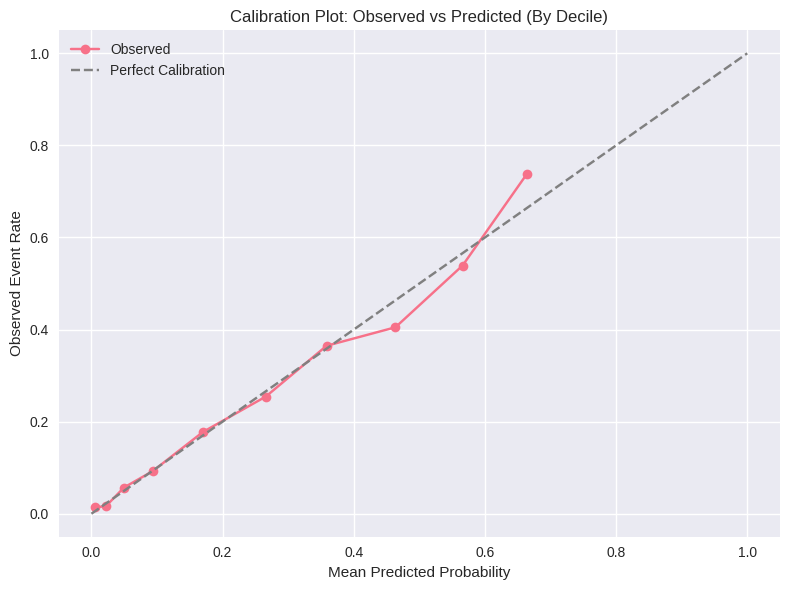

In [ ]:
# y_true = your binary target variable (0/1)
# y_pred = predicted probabilities from model
plot_calibration_by_decile(y_true, y_pred)

## Residual Analysis

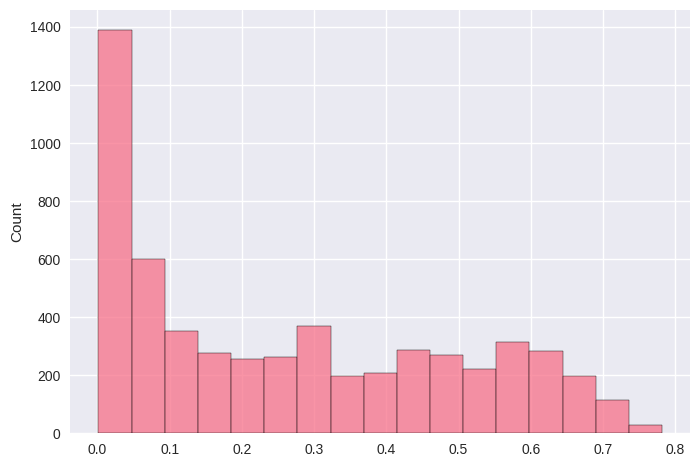

In [ ]:
# histogram of predicted probabilities
sns.histplot(model.predict());

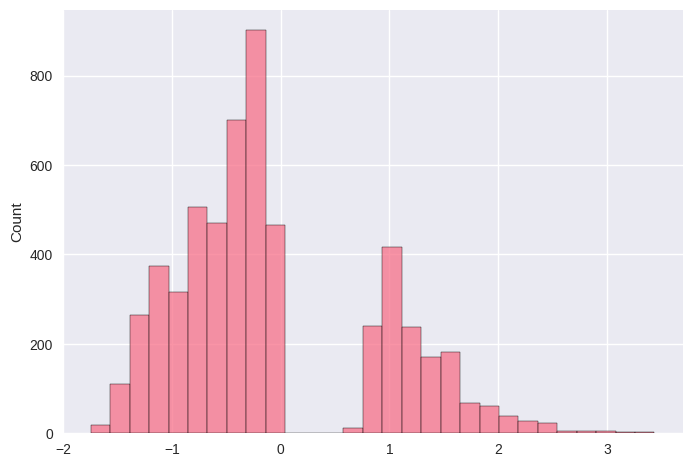

In [ ]:

# histogram of deviance residuals
sns.histplot(model.resid_dev);

<Axes: ylabel='Count'>

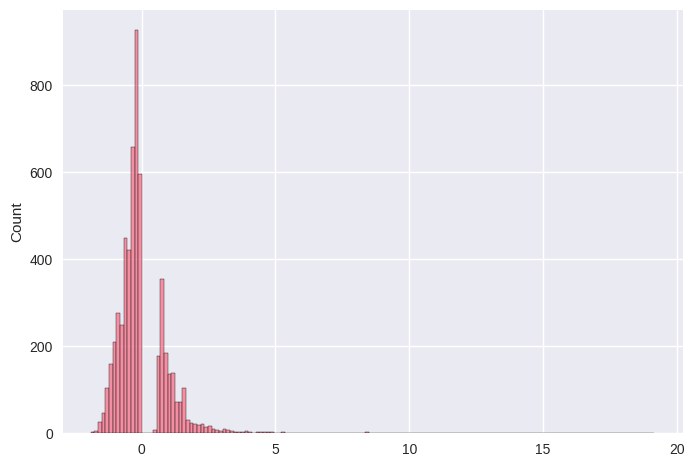

In [ ]:
# plot of Pearson Residuals
sns.histplot(model.resid_pearson)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_residuals(x, xlabel, res_type="deviance"):
    """
    Plots deviance residuals vs predicted probabilities for a fitted statsmodels Logit model.
    """
    if res_type == "deviance":
        residuals = model.resid_dev
    elif res_type == "pearson":
        residuals = model.resid_pearson
    else:
        raise ValueError("Invalid type. Must be 'deviance' or 'pearson'.")

    # Create plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x=x, y=residuals, alpha=0.6, edgecolor='k')
    plt.axhline(0, color='gray', linestyle='--')
    plt.title(f"{res_type} Residuals vs {xlabel}")
    plt.xlabel(f"{xlabel}")
    plt.ylabel(f"{res_type} Residual")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

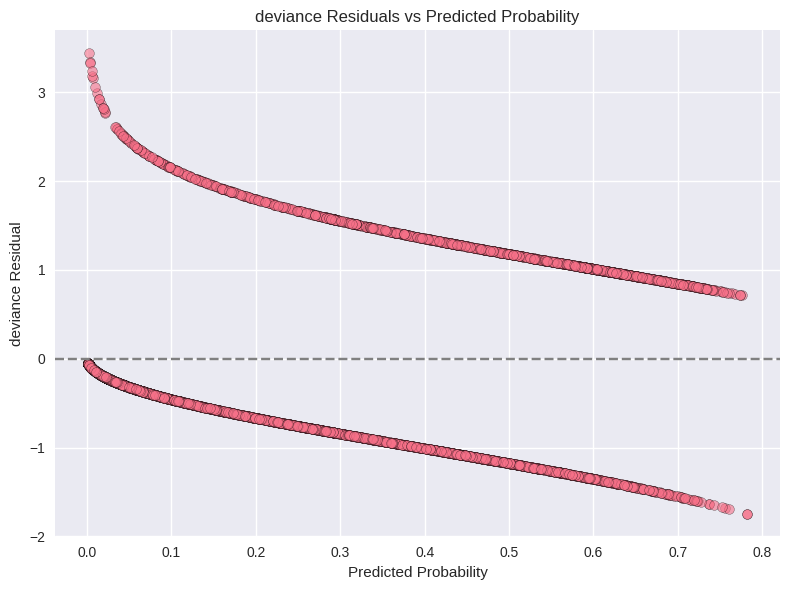

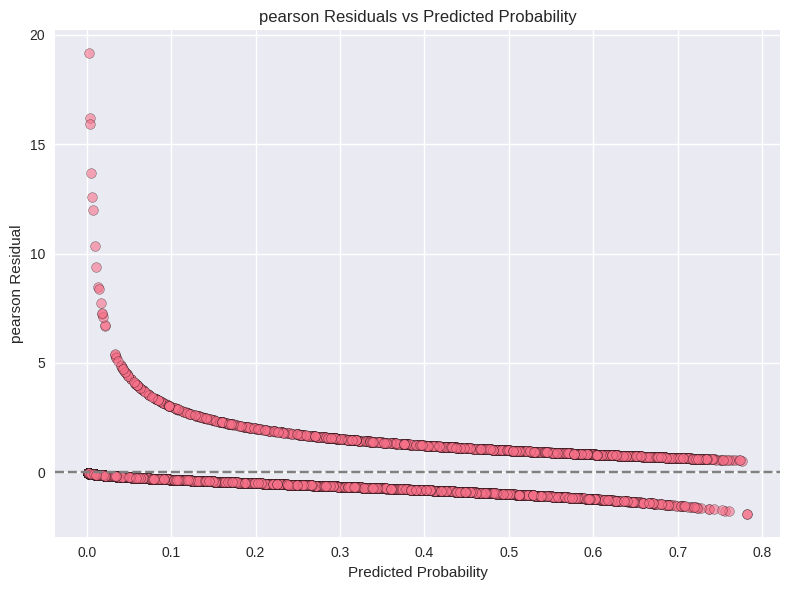

In [ ]:
# Plot Residuals plots
residual_type = ['deviance', 'pearson']
for i in residual_type:
    plot_residuals(x=model.predict(), xlabel='Predicted Probability', res_type=i)

### Deviance Residuals Plot Interpretation

| Pattern Observed                       | Interpretation                                                                 |
| -------------------------------------- | ------------------------------------------------------------------------------ |
| **Symmetrical curved bands**           | ✅ Normal for binary outcomes — deviance residuals are bounded based on `ŷ`.    |
| **No clear systematic trend**          | ✅ Suggests no major model misspecification in general                          |
| **Residuals concentrated near bounds** | ⚠️ Indicates that many predictions are very close to 0 or 1                    |
| **Sparse points near extreme ends**    | Could reflect skew in predicted probabilities or imbalanced class distribution |

### Pearson Residual Plot Interpreation

✅ What Looks Okay:
| Observation                         | Interpretation                       |
| ----------------------------------- | ------------------------------------ |
| Most residuals are close to 0       | Many predictions are fairly accurate |
| Curved shape (bimodal distribution) | Expected for binary outcomes         |

❌ What Looks Bad:
| Issue                                                        | Explanation                                                                           |
| ------------------------------------------------------------ | ------------------------------------------------------------------------------------- |
| **Extremely large residuals at low predicted probabilities** | Suggests that the model **severely underestimates** the probability of positive cases |
| **Residuals > 15**                                           | Indicates **severe misfit or outliers**                                               |
| **Asymmetry in distribution**                                | Possible issue with model calibration or missing interactions                         |


---

## Residual vs Predictors

### Deviance Residuals

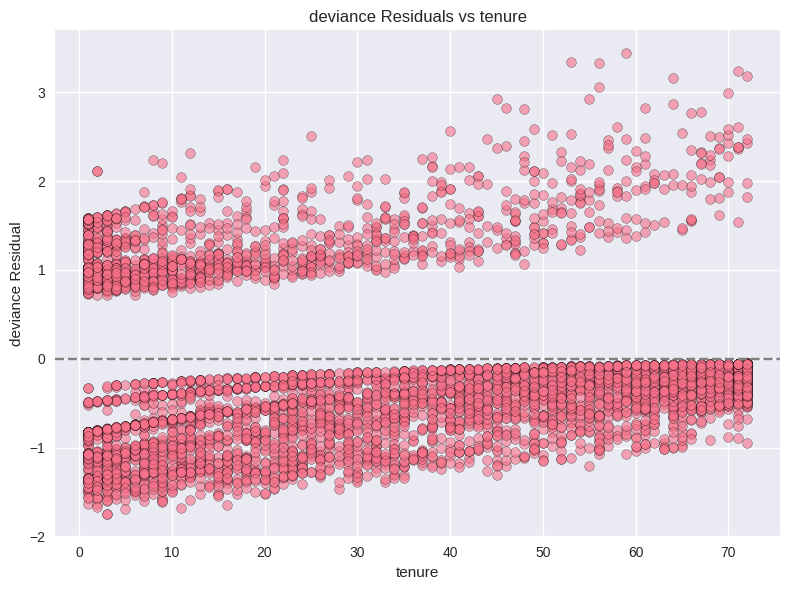

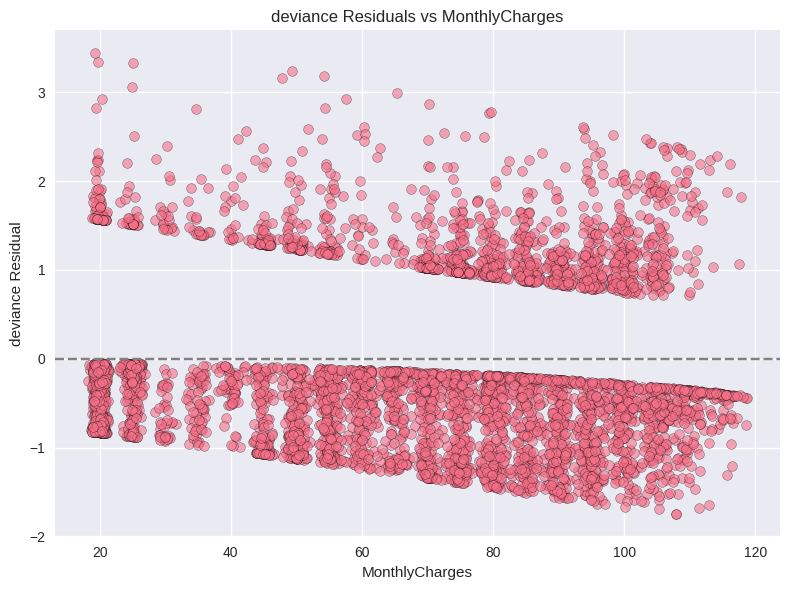

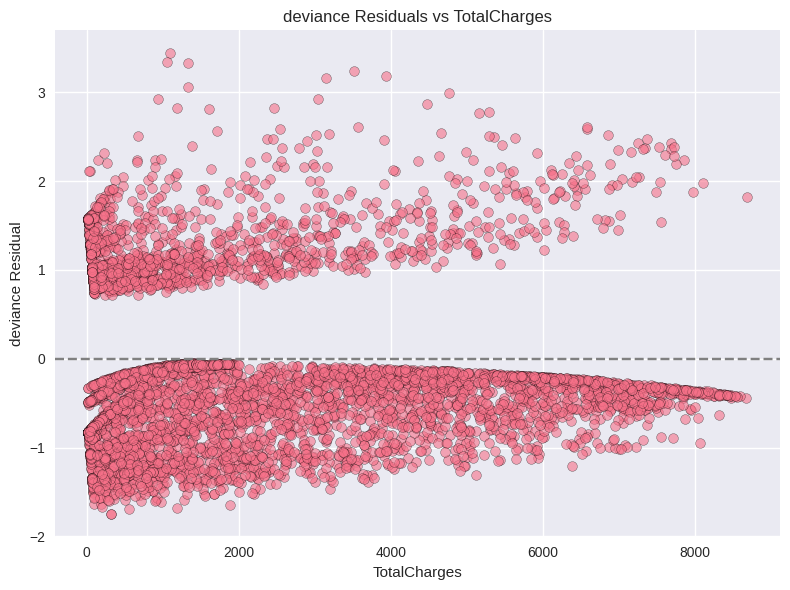

In [ ]:
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in cols:
    plot_residuals(x=X_train[col].values, xlabel=col)

### Residuals vs Predictor
* Although deviance residuals for `tenure` appear to increase for larger values of `tenure`, overall the residuals are evenly spread, centered around 0, with slight funnel shape
* residual values are larger for lower values of `MonthlyCharges` and there appear to be outliers in the data
* There appear to be outliers for `TotalCharges` based on the residual values

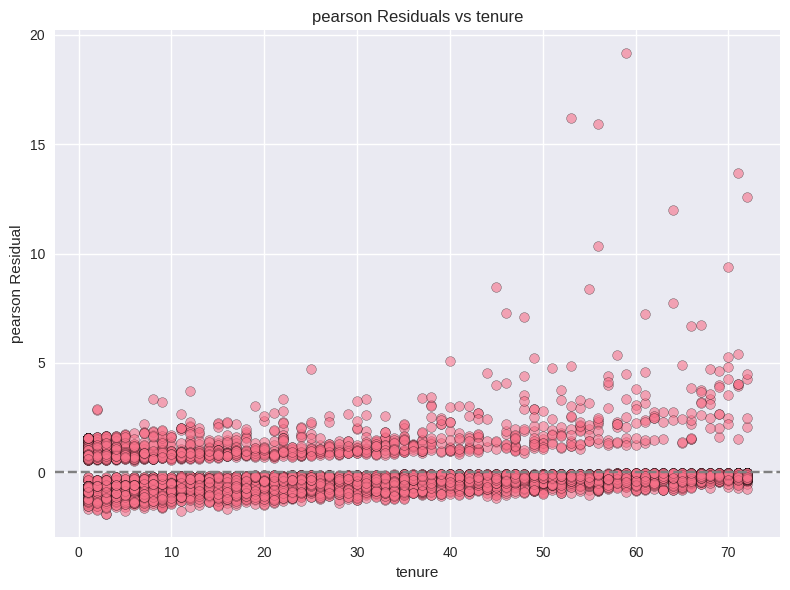

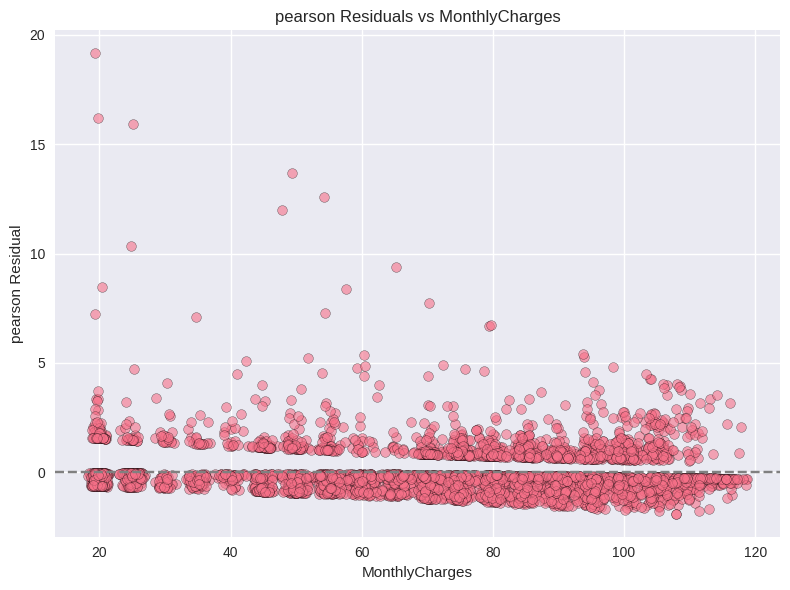

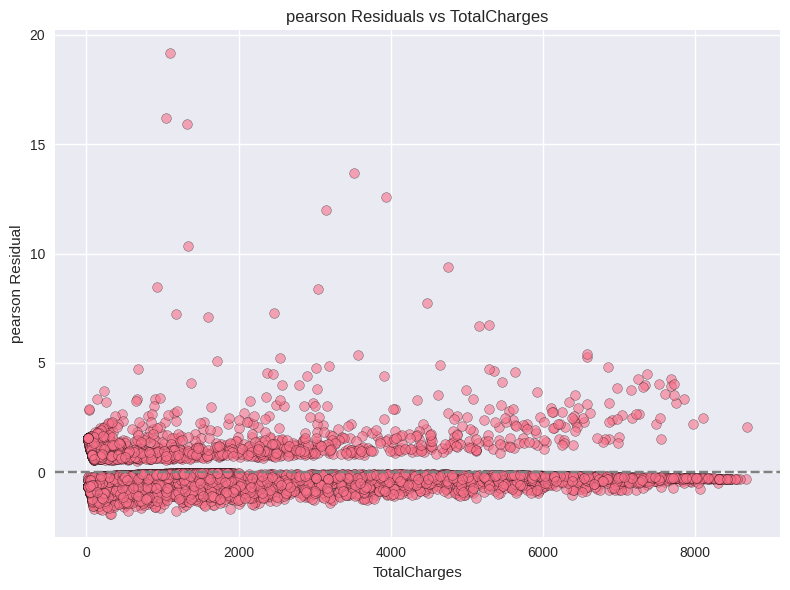

In [ ]:
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in cols:
    plot_residuals(x=X_train[col].values, xlabel=col, res_type='pearson')

<Axes: xlabel='Contract_Month-to-month', ylabel='None'>

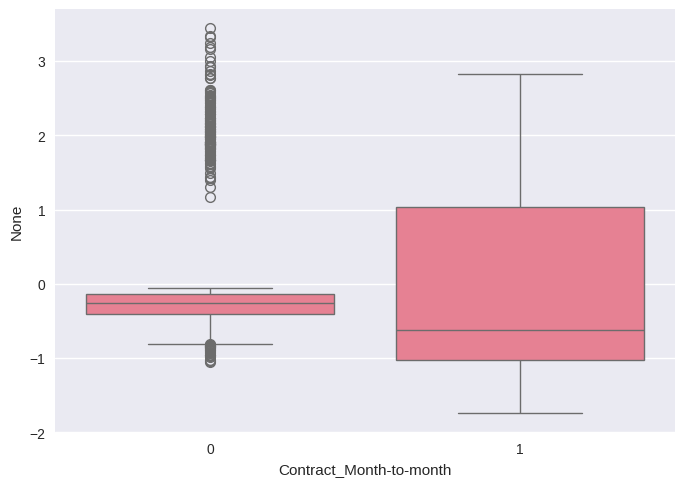

In [ ]:
sns.boxplot(y=model.resid_dev, x=X_train['Contract_Month-to-month'])

<Axes: xlabel='Contract_One year', ylabel='None'>

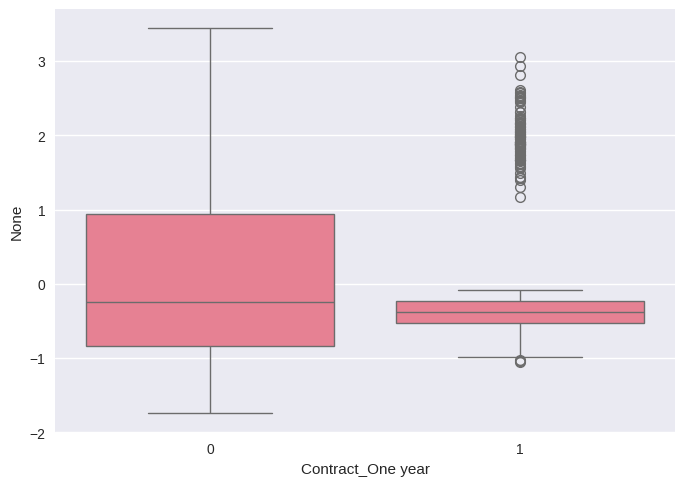

In [ ]:
sns.boxplot(y=model.resid_dev, x=X_train['Contract_One year'])

---

# GOF Assessment

* ✅ Deviance test p-value = 1.000 → Model fits the data very well
    * Sensitive to Log-likelihood differences
    * Computed from Likelihood-based residuals
* Plot of deviance residuals vs predicted probs doesn't look problematic
* ❌ Pearson chi-square p-value = 0.000 → Model has poor fit
    * Sensitive to raw residual size (observed - expected)
    * COmputed fromScaled squared residuals
* Plot of Pearson Residuals vs predicted probs shows higher residual values for lower predicted probabilities, indicating the model is underestimating the probability of positive classes in some cases
* ❌ HL test p-value = 0.000 → Model has poor fit
    * Sensitive to raw residual size (observed - expected)


---

## Logistic Regression Model Assumptions

Let's discuss the assumptions of logistic regression.

### Logistic Regression Assumptions:

1. **Binary Outcome Variable**: The dependent variable must be binary (0/1, True/False, etc.) - satisfied by our survival data.

2. **Independence of Observations**: Each observation should be independent of others - generally satisfied in our dataset.

3. **Linearity in Logit**: Independent variables should be linearly related to the log odds - we can check this with partial residual plots.

4. **No Multicollinearity**: Independent variables should not be highly correlated with each other - we'll check this with VIF.

5. **Large Sample Size**: Logistic regression typically requires a larger sample size - satisfied with our dataset of 891 observations.

6. **No Perfect Separation**: No independent variable should perfectly predict the outcome - we'll check for this.

## Assumption Diagnostics

Let's check if our model satisfies the logistic regression assumptions.

In [ ]:
# Check for multicollinearity using Variance Inflation Factor (VIF)
# Remove constant for VIF calculation
X_train_noconst = X_train.drop('const', axis=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_noconst.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_noconst.values, i)
                   for i in range(len(X_train_noconst.columns))]

print("Variance Inflation Factors (VIF):")
print("VIF > 5 indicates high multicollinearity")
print("VIF > 10 indicates severe multicollinearity")
print()
vif_data.sort_values('VIF', ascending=False)

Variance Inflation Factors (VIF):
VIF > 5 indicates high multicollinearity
VIF > 10 indicates severe multicollinearity



,Feature,VIF
2,MonthlyCharges,12.631039
1,TotalCharges,12.307799
0,tenure,6.804845
4,Contract_Month-to-month,4.332598
3,Contract_One year,1.664464


In [ ]:
# Check for perfect separation
# This can be identified if the model fails to converge or has very large coefficients
print("Checking for perfect separation...")
print("If coefficients are extremely large (>10), it might indicate separation issues.")
print()

# Check for large coefficients
large_coeffs = df_model_params[np.abs(df_model_params['coefficient']) > 10]
if len(large_coeffs) > 0:
    print("Large coefficients detected:")
    print(large_coeffs)
else:
    print("No extremely large coefficients detected - no separation issues.")

Checking for perfect separation...
If coefficients are extremely large (>10), it might indicate separation issues.

No extremely large coefficients detected - no separation issues.


---

# Model Evaluation

=== Metric Scores ===
Accuracy:  0.779
Precision: 0.607
Recall:    0.479
F1 Score:  0.535
ROC AUC:   0.815
PR AUC:    0.593


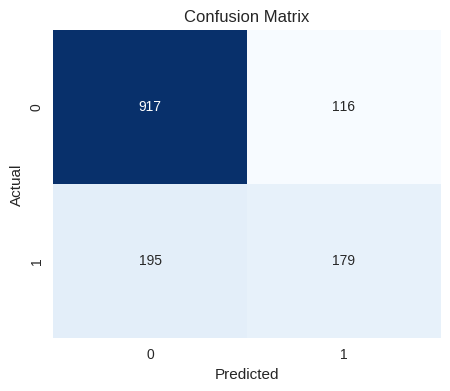

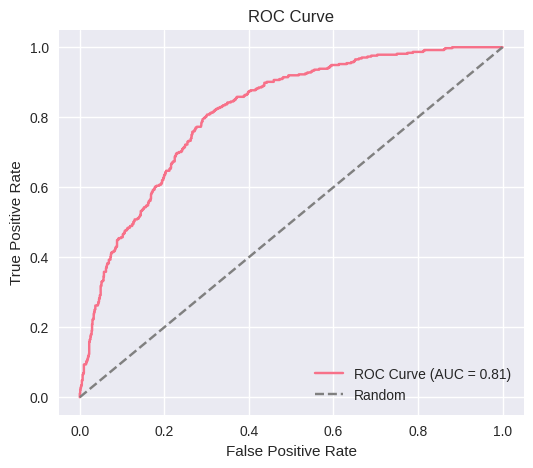

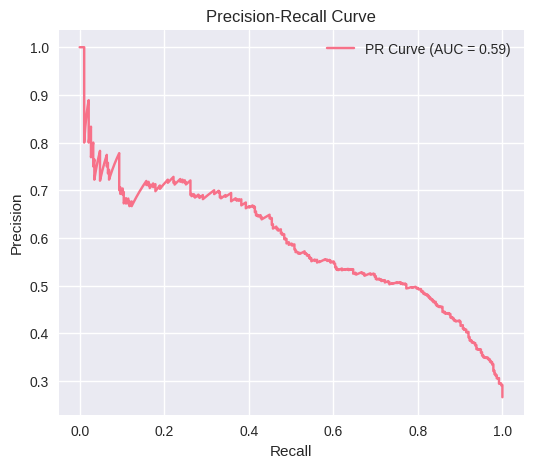


=== Classification Report ===
              precision    recall  f1-score   support

           0      0.825     0.888     0.855      1033
           1      0.607     0.479     0.535       374

    accuracy                          0.779      1407
   macro avg      0.716     0.683     0.695      1407
weighted avg      0.767     0.779     0.770      1407



In [ ]:
# Binary Classification Metrics Visualization Script
# --------------------------------------------------
# Assumes:
# - `y_test`: true labels (0 or 1)
# - `y_pred`: predicted class labels from model
# - `y_pred_prob`: predicted probabilities from model.predict_proba(X_test)[:, 1]

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report,
    roc_auc_score, average_precision_score,
    roc_curve, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def convert_to_binary(x: pd.Series) -> pd.Series:
    return x.apply(lambda x: 1 if x >= 0.5 else 0)

y_pred_prob = model.predict(X_test)
y_pred = convert_to_binary(y_pred_prob)


# 1. Basic metric scores
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)
roc_auc   = roc_auc_score(y_test, y_pred_prob)
avg_prec  = average_precision_score(y_test, y_pred_prob)

print("=== Metric Scores ===")
print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")
print(f"ROC AUC:   {roc_auc:.3f}")
print(f"PR AUC:    {avg_prec:.3f}")

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3. ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# 4. Precision-Recall Curve
precisions, recalls, pr_thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(6, 5))
plt.plot(recalls, precisions, label=f'PR Curve (AUC = {avg_prec:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.legend()
plt.show()

# 5. Classification Report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=3))

# Threshold Tuning

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.p

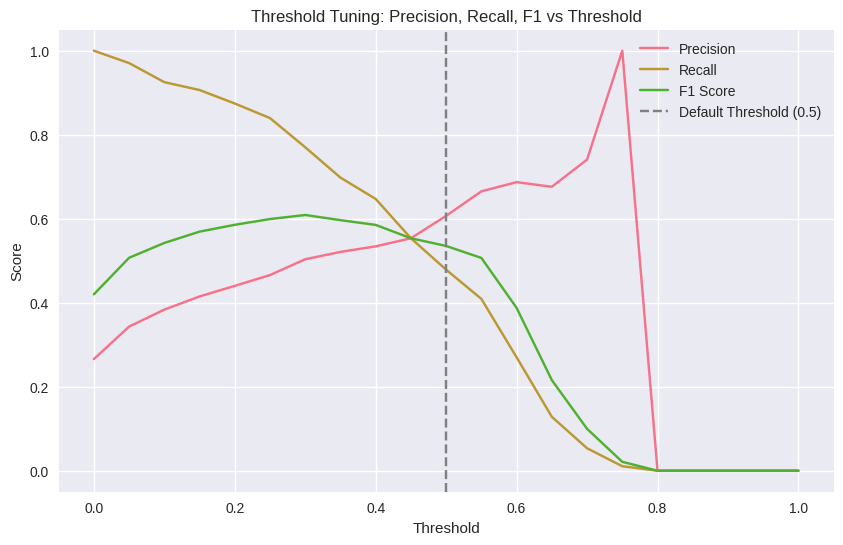

Best threshold for F1 score: 0.30
Precision: 0.503, Recall: 0.770, F1: 0.609
Confusion Matrix at Best Threshold:
[[749 284]
 [ 86 288]]


In [ ]:
# Threshold Tuning in Binary Classification
# -----------------------------------------
# In binary classification, most classifiers return probabilities.
# By default, a threshold of 0.5 is used to convert probabilities to class labels (0 or 1).
# But in some cases (e.g. imbalanced classes, business costs), we may want to change the threshold.

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt
import numpy as np

# # Step 4: Predict probabilities instead of class labels
y_proba = model.predict(X_test)

# Step 5: Tune threshold manually
thresholds = np.arange(0.0, 1.05, 0.05)  # Try thresholds from 0 to 1
precisions, recalls, f1s = [], [], []

for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)  # Apply custom threshold

    # Evaluate metrics at this threshold
    precisions.append(precision_score(y_test, y_pred_thresh))
    recalls.append(recall_score(y_test, y_pred_thresh))
    f1s.append(f1_score(y_test, y_pred_thresh))

# Step 6: Plot Precision/Recall/F1 vs Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1s, label='F1 Score')
plt.axvline(0.5, color='gray', linestyle='--', label='Default Threshold (0.5)')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Tuning: Precision, Recall, F1 vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Pick optimal threshold (e.g., highest F1)
best_thresh_idx = np.argmax(f1s)
best_threshold = thresholds[best_thresh_idx]
print(f"Best threshold for F1 score: {best_threshold:.2f}")
print(f"Precision: {precisions[best_thresh_idx]:.3f}, Recall: {recalls[best_thresh_idx]:.3f}, F1: {f1s[best_thresh_idx]:.3f}")

# Optional: Final Confusion Matrix at best threshold
y_final = (y_proba >= best_threshold).astype(int)
cm = confusion_matrix(y_test, y_final)
print("Confusion Matrix at Best Threshold:")
print(cm)

---

# Cross Validation

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, average_precision_score
)

def cross_validate_logit_all_metrics(df, target, predictors, k=5):
    """
    Perform k-fold cross-validation for a logistic regression model using statsmodels,
    and evaluate multiple classification metrics.

    Parameters:
        df (pd.DataFrame): The dataset
        target (str): Name of the binary target variable
        predictors (list): List of feature column names
        k (int): Number of cross-validation folds

    Returns:
        metrics (dict): Dictionary with per-fold scores
        mean_scores (dict): Dictionary with average scores
    """
    # Store results
    metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'roc_auc': [],
        'pr_auc': []
    }

    X = df[predictors]
    y = target
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Add intercept
        X_train_const = sm.add_constant(X_train)
        X_test_const = sm.add_constant(X_test)

        # Fit model
        model = sm.Logit(y_train, X_train_const)
        result = model.fit(disp=0)

        # Predictions
        y_pred_prob = result.predict(X_test_const)
        y_pred_class = (y_pred_prob >= 0.5).astype(int)

        # Evaluate metrics
        metrics['accuracy'].append(accuracy_score(y_test, y_pred_class))
        metrics['precision'].append(precision_score(y_test, y_pred_class, zero_division=0))
        metrics['recall'].append(recall_score(y_test, y_pred_class))
        metrics['f1'].append(f1_score(y_test, y_pred_class))
        metrics['roc_auc'].append(roc_auc_score(y_test, y_pred_prob))
        metrics['pr_auc'].append(average_precision_score(y_test, y_pred_prob))

    # Mean of each metric
    mean_scores = {metric: round(np.mean(scores), 4) for metric, scores in metrics.items()}

    return metrics, mean_scores

In [ ]:
cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract_One year', 'Contract_Month-to-month']
metrics, mean_scores = cross_validate_logit_all_metrics(df=X_train, target=y_train, predictors=cols, k=5)
print(metrics)
print(mean_scores)

{'accuracy': [0.7866666666666666, 0.7795555555555556, 0.8177777777777778, 0.7733333333333333, 0.7911111111111111], 'precision': [0.6363636363636364, 0.6015625, 0.6322869955156951, 0.6452991452991453, 0.6388888888888888], 'recall': [0.48514851485148514, 0.5133333333333333, 0.5340909090909091, 0.4674922600619195, 0.5278688524590164], 'f1': [0.550561797752809, 0.5539568345323741, 0.5790554414784395, 0.5421903052064632, 0.578096947935368], 'roc_auc': [np.float64(0.8339416058394162), np.float64(0.8145717171717172), np.float64(0.8473586034561643), np.float64(0.8274553554195008), np.float64(0.8322690923630548)], 'pr_auc': [np.float64(0.630451363664075), np.float64(0.6176139632544759), np.float64(0.6177221411799584), np.float64(0.6289587231851587), np.float64(0.6169511109645659)]}
{'accuracy': np.float64(0.7897), 'precision': np.float64(0.6309), 'recall': np.float64(0.5056), 'f1': np.float64(0.5608), 'roc_auc': np.float64(0.8311), 'pr_auc': np.float64(0.6223)}


In [ ]:
pd.DataFrame(metrics)

,accuracy,precision,recall,f1,roc_auc,pr_auc
0,0.786667,0.636364,0.485149,0.550562,0.833942,0.630451
1,0.779556,0.601562,0.513333,0.553957,0.814572,0.617614
2,0.817778,0.632287,0.534091,0.579055,0.847359,0.617722
3,0.773333,0.645299,0.467492,0.542190,0.827455,0.628959
4,0.791111,0.638889,0.527869,0.578097,0.832269,0.616951


---

In [ ]:
dispersion =(sum(model.resid_dev**2))/model.df_resid
print(f"Actual Dispersion: {dispersion}")
print(f"Assumed Dispersion: {model.scale}")

Actual Dispersion: 0.866488174759478
Assumed Dispersion: 1.0


🔍 What It Means
* The dispersion statistic compares the observed variance to the model-expected variance. When:
    * Dispersion ≈ 1.0 → Model is well-calibrated
    * Dispersion > 1.0 → Overdispersion (observed variance > expected)
    * Dispersion < 1.0 → Underdispersion (observed variance < expected)

---
| Feature                 | Interpretation                                                                   |
| ----------------------- | -------------------------------------------------------------------------------- |
| **Dispersion < 1**      | Your model **overestimates** the variance a bit                                  |
| **Variance is tighter** | Observed outcomes are **more consistent** than expected under the binomial model |
| **Deviance residuals**  | Likely smaller in magnitude overall                                              |

# Model Comparison

In [ ]:
import statsmodels.api as sm
from scipy.stats import chi2

def compare_logit_models(model1, model2):
    """
    Compares two nested logistic regression models using:
    - AIC
    - BIC
    - Log-Likelihood Ratio Test (LLR)
    - Pseudo R² (McFadden)

    Parameters:
    model1: statsmodels fitted Logit model (reduced / simpler)
    model2: statsmodels fitted Logit model (full / more complex)
    """
    print("Model 1 (simpler):")
    print(f"  AIC: {model1.aic:.2f}")
    print(f"  BIC: {model1.bic:.2f}")
    print(f"  Log-Likelihood: {model1.llf:.2f}")
    print()

    print("Model 2 (full):")
    print(f"  AIC: {model2.aic:.2f}")
    print(f"  BIC: {model2.bic:.2f}")
    print(f"  Log-Likelihood: {model2.llf:.2f}")
    print()

    # McFadden Pseudo R²
    pseudo_r2_1 = 1 - (model1.llf / model1.llnull)
    pseudo_r2_2 = 1 - (model2.llf / model2.llnull)
    print(f"McFadden Pseudo R² (Model 1): {pseudo_r2_1:.4f}")
    print(f"McFadden Pseudo R² (Model 2): {pseudo_r2_2:.4f}")
    print()

    # Log-Likelihood Ratio Test
    lr_stat = 2 * (model2.llf - model1.llf)
    df_diff = model2.df_model - model1.df_model
    p_value = chi2.sf(lr_stat, df_diff)

    print("Log-Likelihood Ratio Test:")
    print(f"  Chi-squared Statistic: {lr_stat:.2f}")
    print(f"  Degrees of Freedom: {df_diff}")
    print(f"  p-value: {p_value:.4f}")

    if p_value < 0.05:
        print("  ✅ Model 2 is significantly better than Model 1.")
    else:
        print("  ❌ No significant difference between models.")

In [ ]:
compare_logit_models(model, model)

Model 1 (simpler):
  AIC: 4880.80
  BIC: 4920.61
  Log-Likelihood: -2434.40

Model 2 (full):
  AIC: 4880.80
  BIC: 4920.61
  Log-Likelihood: -2434.40

McFadden Pseudo R² (Model 1): 0.2526
McFadden Pseudo R² (Model 2): 0.2526

Log-Likelihood Ratio Test:
  Chi-squared Statistic: 0.00
  Degrees of Freedom: 0.0
  p-value: nan
  ❌ No significant difference between models.
